# House Price Prediction using Multiple Linear Regression

Data Source : Kaggle
url : https://www.kaggle.com/datasets/shree1992/housedata?resource=download

Data imported and missing values added for simulation of data handling

In [100]:
# Import Libraries
import pandas as pd 
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt
# Polynomial Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [80]:
# Read initial Data
df=pd.read_csv("HouseData.csv")

In [81]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [82]:
# Trim required data and store in new csv file
df=df[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country',  'price']]
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,3.130000e+05
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2.384000e+06
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,3.420000e+05
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,4.200000e+05
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,3.081667e+05
4596,2014-07-09 00:00:00,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.343333e+05
4597,2014-07-09 00:00:00,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,4.169042e+05
4598,2014-07-10 00:00:00,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2.034000e+05


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  price          4600 non-null   float64
dtypes: float

In [84]:
df = df.mask(np.random.random(df.shape) < .1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4111 non-null   object 
 1   bedrooms       4160 non-null   float64
 2   bathrooms      4118 non-null   float64
 3   sqft_living    4121 non-null   float64
 4   sqft_lot       4164 non-null   float64
 5   floors         4132 non-null   float64
 6   waterfront     4139 non-null   float64
 7   view           4154 non-null   float64
 8   condition      4153 non-null   float64
 9   sqft_above     4158 non-null   float64
 10  sqft_basement  4124 non-null   float64
 11  yr_built       4174 non-null   float64
 12  yr_renovated   4162 non-null   float64
 13  street         4128 non-null   object 
 14  city           4140 non-null   object 
 15  statezip       4126 non-null   object 
 16  country        4151 non-null   object 
 17  price          4141 non-null   float64
dtypes: float

In [85]:

file_name = 'HouseDataMultiple.csv'
df.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Working of Saved Data

In [86]:
df = pd.read_csv(file_name)
df=df.drop(["Unnamed: 0"], axis=1)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,2014-05-02 00:00:00,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,NaN,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,3.130000e+05
1,2014-05-02 00:00:00,5.0,2.50,NaN,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,NaN,709 W Blaine St,Seattle,WA 98119,USA,2.384000e+06
2,2014-05-02 00:00:00,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,NaN,1966.0,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA,3.420000e+05
3,2014-05-02 00:00:00,3.0,2.25,NaN,8030.0,1.0,NaN,0.0,4.0,1000.0,1000.0,NaN,0.0,857 170th Pl NE,Bellevue,NaN,USA,4.200000e+05
4,2014-05-02 00:00:00,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,NaN,1140.0,800.0,NaN,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,NaN,1.75,1510.0,6360.0,NaN,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,501 N 143rd St,NaN,WA 98133,USA,3.081667e+05
4596,2014-07-09 00:00:00,NaN,NaN,1460.0,NaN,2.0,0.0,0.0,3.0,NaN,0.0,1983.0,2009.0,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.343333e+05
4597,2014-07-09 00:00:00,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA,4.169042e+05
4598,2014-07-10 00:00:00,4.0,2.00,2090.0,NaN,1.0,0.0,0.0,3.0,NaN,1020.0,NaN,0.0,5148 S Creston St,Seattle,WA 98178,USA,2.034000e+05


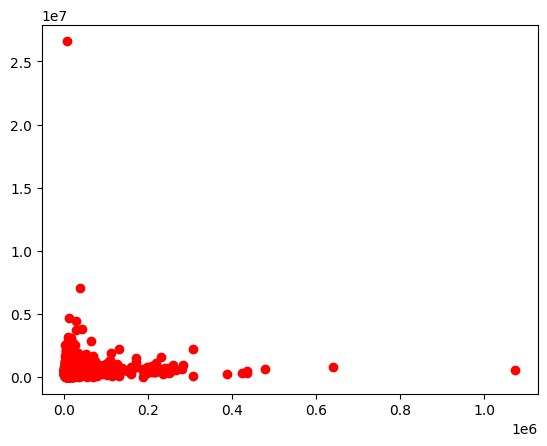

In [87]:
plt.scatter(df.sqft_lot, df.price, c='red')

### Fill NaN cells

In [88]:
new_df=df.fillna("NULL")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   bedrooms       4600 non-null   object
 2   bathrooms      4600 non-null   object
 3   sqft_living    4600 non-null   object
 4   sqft_lot       4600 non-null   object
 5   floors         4600 non-null   object
 6   waterfront     4600 non-null   object
 7   view           4600 non-null   object
 8   condition      4600 non-null   object
 9   sqft_above     4600 non-null   object
 10  sqft_basement  4600 non-null   object
 11  yr_built       4600 non-null   object
 12  yr_renovated   4600 non-null   object
 13  street         4600 non-null   object
 14  city           4600 non-null   object
 15  statezip       4600 non-null   object
 16  country        4600 non-null   object
 17  price          4600 non-null   object
dtypes: object(18)
memory usage: 

### Drop NA Cells

In [89]:
new_df=df.dropna().reset_index()

In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          709 non-null    int64  
 1   date           709 non-null    object 
 2   bedrooms       709 non-null    float64
 3   bathrooms      709 non-null    float64
 4   sqft_living    709 non-null    float64
 5   sqft_lot       709 non-null    float64
 6   floors         709 non-null    float64
 7   waterfront     709 non-null    float64
 8   view           709 non-null    float64
 9   condition      709 non-null    float64
 10  sqft_above     709 non-null    float64
 11  sqft_basement  709 non-null    float64
 12  yr_built       709 non-null    float64
 13  yr_renovated   709 non-null    float64
 14  street         709 non-null    object 
 15  city           709 non-null    object 
 16  statezip       709 non-null    object 
 17  country        709 non-null    object 
 18  price     

In [91]:
new_df=new_df.drop(['index'], axis=1)

# Working with Correct Data

In [27]:
# Read initial Data
df=pd.read_csv("HouseData.csv")

In [92]:
polyreg = PolynomialFeatures(degree=2)

In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       709 non-null    float64
 1   bathrooms      709 non-null    float64
 2   sqft_living    709 non-null    float64
 3   sqft_lot       709 non-null    float64
 4   floors         709 non-null    float64
 5   waterfront     709 non-null    float64
 6   view           709 non-null    float64
 7   condition      709 non-null    float64
 8   sqft_above     709 non-null    float64
 9   sqft_basement  709 non-null    float64
 10  yr_built       709 non-null    float64
 11  yr_renovated   709 non-null    float64
 12  price          709 non-null    float64
dtypes: float64(13)
memory usage: 72.1 KB


In [94]:
new_df=new_df.drop(['date','street', 'city', 'statezip', 'country'], axis=1)

In [95]:
new_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4.0,2.50,2710.0,35868.0,2.0,0.0,0.0,3.0,2710.0,0.0,1989.0,0.0,482000.000000
1,3.0,1.50,1180.0,10277.0,1.0,0.0,0.0,3.0,1180.0,0.0,1983.0,2009.0,275000.000000
2,4.0,1.00,1450.0,8800.0,1.0,0.0,0.0,4.0,1450.0,0.0,1954.0,1979.0,435000.000000
3,3.0,2.25,1750.0,1572.0,2.5,0.0,0.0,3.0,1470.0,280.0,2005.0,0.0,626000.000000
4,4.0,2.50,2730.0,12261.0,2.0,0.0,0.0,3.0,2730.0,0.0,1991.0,0.0,612500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,3.0,1.75,1880.0,10032.0,1.0,0.0,0.0,4.0,1880.0,0.0,1984.0,0.0,486445.833333
705,3.0,1.00,1890.0,3330.0,1.5,0.0,0.0,4.0,1390.0,500.0,1901.0,0.0,486895.000000
706,3.0,1.75,1880.0,5752.0,1.0,0.0,0.0,4.0,940.0,940.0,1945.0,0.0,396166.666667
707,3.0,2.50,2538.0,4600.0,2.0,0.0,0.0,3.0,2538.0,0.0,2013.0,1923.0,289373.307692


In [98]:
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [99]:
x_poly=polyreg.fit_transform(x)

In [101]:
linreg = LinearRegression()

In [102]:
linreg.fit(x_poly, y)

LinearRegression()

In [103]:
linreg.coef_

array([ 7.41303630e+01, -6.45031359e+05,  3.21809355e+05,  1.39201038e+03,
       -1.07940115e+02,  1.38440227e+06, -2.56456085e-03, -9.96069467e+05,
        1.72635559e+06,  2.69771881e+03, -1.30524893e+03,  1.75881359e+04,
        2.64448724e+03, -3.20569039e+03, -8.84501617e+03,  8.41076743e+00,
        3.54353646e-01,  4.03938524e+04,  2.44117855e-01, -7.16038352e+04,
        1.42431330e+04, -1.01830080e+00,  9.43059161e+00,  2.59930585e+02,
        8.21123467e+00, -7.94872402e+04,  7.60639779e+01, -2.18080493e+00,
        9.02749978e+03,  2.05073209e-01, -2.66648635e+03, -1.04576166e+05,
       -6.99848519e+00,  8.30593170e+01,  1.47785166e+02, -2.00365662e+01,
        7.82504932e-01,  2.32993720e+00, -3.83234321e+01,  1.97736347e+02,
        3.49571758e+01,  4.61496305e+01, -3.24242375e-01, -8.01985146e-01,
       -1.40757244e+00,  1.59459736e-01,  3.71388160e-06,  7.98426022e-01,
       -1.18260548e+01, -2.29155600e-01,  2.02022458e-01, -2.33052419e+00,
       -2.32838430e+00,  

In [104]:
linreg.intercept_

-21336531.023617942